In [1]:
from ase.build import bulk
from ase.visualize.plot import plot_atoms
from ase.build.surfaces_with_termination import surfaces_with_termination
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(25,10))
import numpy as np
import Tools as tl
from ase.build import sort
from ase.io.vasp import read_vasp
from ase.build import surface, make_supercell
from ase.build import sort
from ase.geometry import get_layers

## Creo celda ZrO2 2x2 y un sitio tipo 'hollow1'

In [2]:
zro2 = read_vasp('Structure/POSCAR')

ZrO2001Oterm = surfaces_with_termination(zro2, [0,0,1],layers=4, vacuum=15., termination='O',verbose=True, symmetric=True)

ZrO2001Oterm_2x2_unsorted = [make_supercell(thisurface,[[2,0,0],[0,2,0],[0,0,1]],tol=1e-10, wrap=True) for thisurface in ZrO2001Oterm]
ZrO2001Oterm_2x2 = [sort(thissurface.copy()) for thissurface in ZrO2001Oterm_2x2_unsorted]

layer, height = get_layers(ZrO2001Oterm_2x2[0], (0,0,1), tolerance=0.7)
h_sitios = max(height)
hollow1 = ZrO2001Oterm_2x2[0].positions[layer == 13].mean(axis=0)[:2]
hollow1 = np.append(hollow1, h_sitios)
ZrO2001Oterm_2x2[0].info = {'adatom': {'top': {'hollow1': hollow1}}}
onhollow1 = tl.make_adstruc(ZrO2001Oterm_2x2[0], 'hollow1', thesite='hollow1', theface='top',)

([4], ['Zr']) ([20], ['O'])
([3], ['O']) ([18], ['O'])
([5], ['Zr']) ([21], ['O'])
([2], ['O']) ([19], ['O'])


## Creo celda Zr 1x1, roto, hago simetria, agrego sitio tipo "top"

In [3]:
zrhcp = bulk('Zr', crystalstructure='hcp')
zrortho = bulk('Zr', crystalstructure='hcp', orthorhombic=True)

Zr0001 = surfaces_with_termination(zrortho, (0, 0, 1), 5, vacuum=10, termination='Zr')[0]

rotated = []
RotAdStruc = []
rotatedsymmetric = []
title = []
dang = 15  # saltos entre los ángulos siguientes
planos = ['0001']
surfaces = [Zr0001]
cantplanos = 1

for i, (plano, surface) in enumerate(zip(planos, surfaces)): # in range(0, len(planos)):
    rotatedsymmetric = tl.make_symmetric(surface, natoms=2)
    for ang in range(75, 91, dang):
        rotated.append(sort(rotatedsymmetric.copy()))
        rotated[-1].center()
        rotated[-1].rotate(ang, 'z', center="com")
        tl.get_adsite(rotated[-1], site='top', face='bottom')   # bottom para metal
        print(rotated[-1].info)
        RotAdStruc.append(tl.make_adstruc(rotated[-1], 'RotBotTop', theface='bottom', thesite='top'))
        name = f'{ang}_{plano}_rotated.vasp'
        rotated[-1].write(name, direct=True, sort=True)
        title.append(f'Zr rotad {ang} º')

{'adatom': {'bottom': {'top': array([ 3.15726599,  1.49622646, 11.2863475 ])}}}
{'adatom': {'bottom': {'top': array([ 0.19804022,  1.93796091, 11.2863475 ])}}}


Text(0.5, 1.0, 'ZrO2')

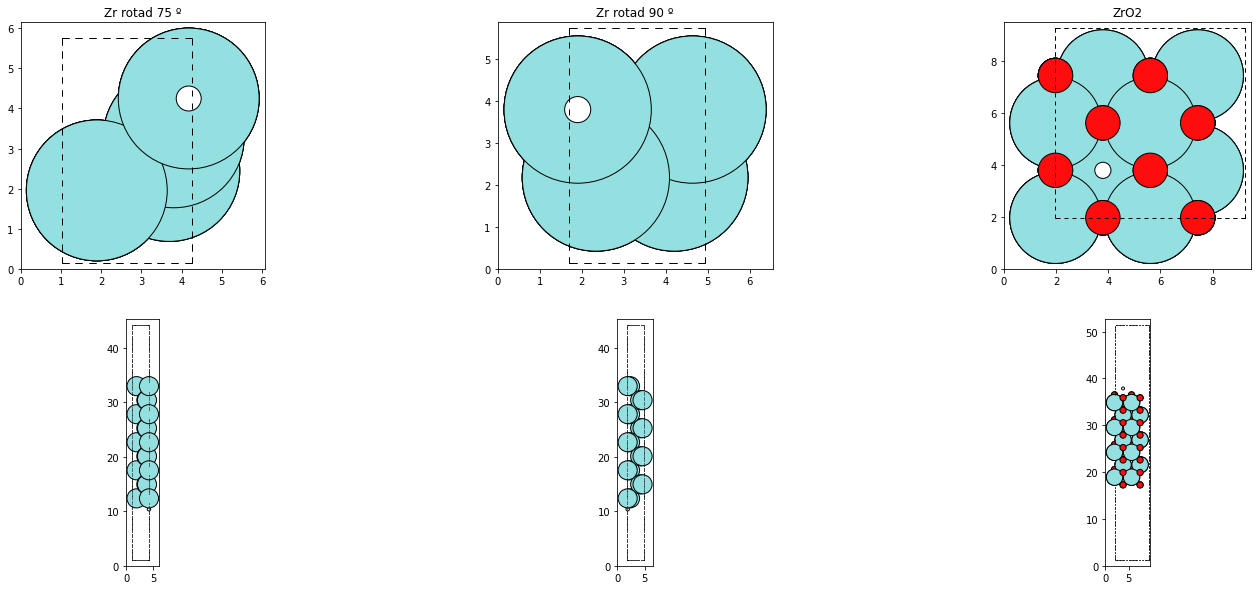

In [4]:
fig, ax = plt.subplots(2, len(RotAdStruc)+1)

for i , (theroted, thetitle) in enumerate(zip(RotAdStruc, title)): #range(len(RotAdStruc)):
    plot_atoms(theroted, ax=ax[0,i], rotation='-180x')
    plot_atoms(theroted, ax=ax[1,i], rotation='-90x')
    ax[0,i].set_title(thetitle)

plot_atoms(onhollow1, ax=ax[0,-1])
plot_atoms(onhollow1, ax=ax[1,-1], rotation='-90x')
ax[0,-1].set_title('ZrO2')

# Lo de arriba no estaria funcionando. 

In [2]:
%run newstack.py

Cell([7.268397980708341, 7.268397980708341, 56.53437842440405])
